In [56]:
#Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/peta-cruelty-free-brands/brands.csv')
df.head()
df.info()
df.describe(include='all')
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand_name      99 non-null     object
 1   cruelty_free    99 non-null     bool  
 2   parent_company  99 non-null     object
 3   certification   55 non-null     object
 4   category        99 non-null     object
 5   price_tier      99 non-null     object
dtypes: bool(1), object(5)
memory usage: 4.1+ KB


Index(['brand_name', 'cruelty_free', 'parent_company', 'certification',
       'category', 'price_tier'],
      dtype='object')

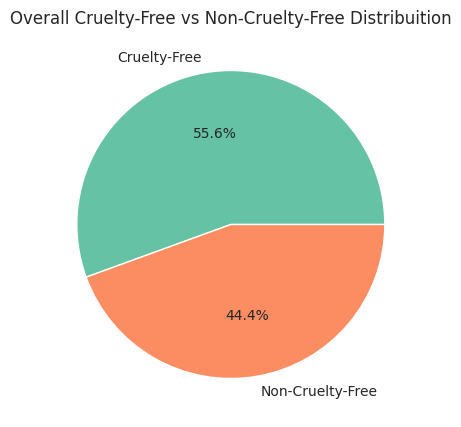

In [70]:
cf_counts = df['cruelty_free_label'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(cf_counts, labels=cf_counts.index, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Overall Cruelty-Free vs Non-Cruelty-Free Distribuition')
plt.show()


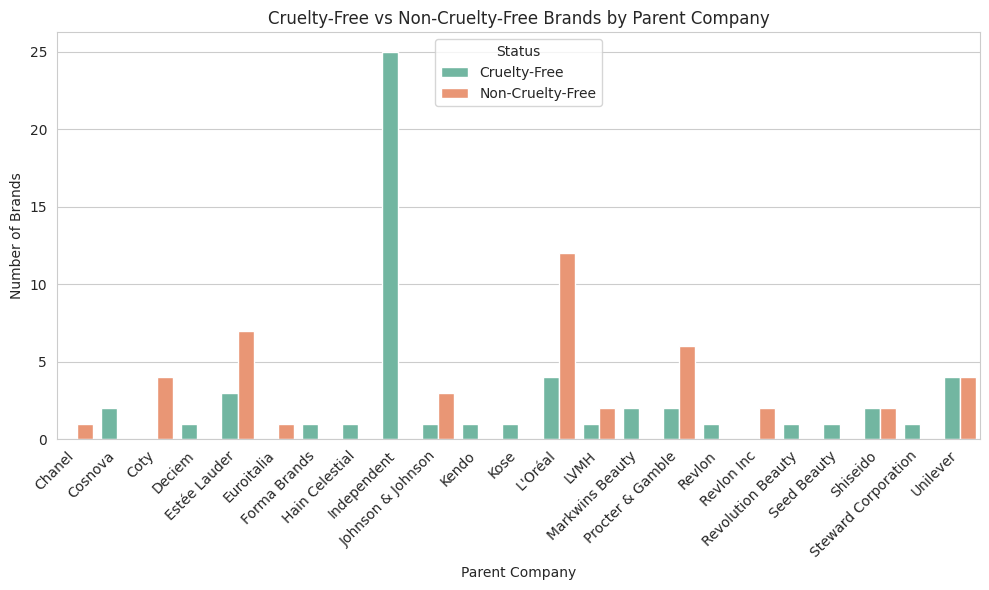

In [63]:
# Group by parent company owning Cruelty-Free vs Non-Cruelty-Free products
plt.figure(figsize=(10,6))
sns.barplot(
    x='parent_company',
    y='count',
    hue='cruelty_free',
    data=company_cf,
    hue_order=[True, False]  # True = cruelty-free (blue), False = non-cruelty-free (orange)
)
plt.title('Cruelty-Free vs Non-Cruelty-Free Brands by Parent Company')
plt.xlabel('Parent Company') #x axis = parent company
plt.ylabel('Number of Brands') 
plt.xticks(rotation=45, ha='right')

#Display legends
##blue = Cruelty-Free
#orange = Non-Cruelty-Free Brands
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Cruelty-Free', 'Non-Cruelty-Free'], title='Status')
plt.tight_layout()
plt.show()
#Johnson & Johnson and LVMH have many non-cruelty-free brands.
# Independent (no parent company) or L’Oréal have more cruelty-free brands.

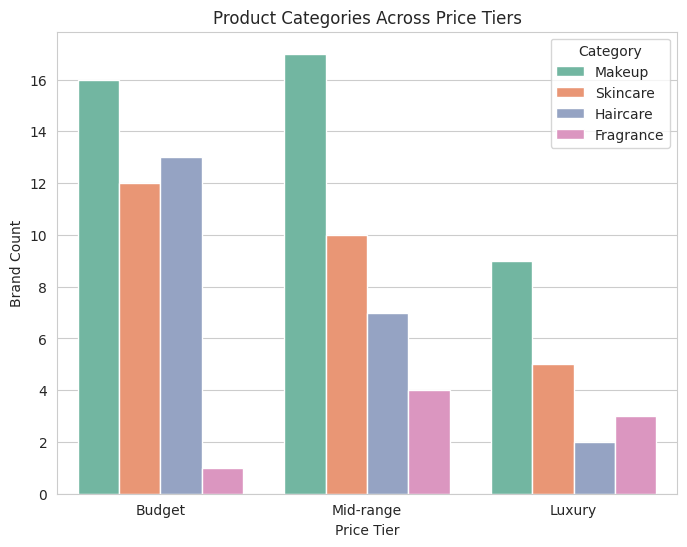

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(x='price_tier', hue='category', data=df)
plt.title('Product Categories Across Price Tiers')
plt.xlabel('Price Tier')
plt.ylabel('Brand Count')
plt.legend(title='Category')
plt.show()


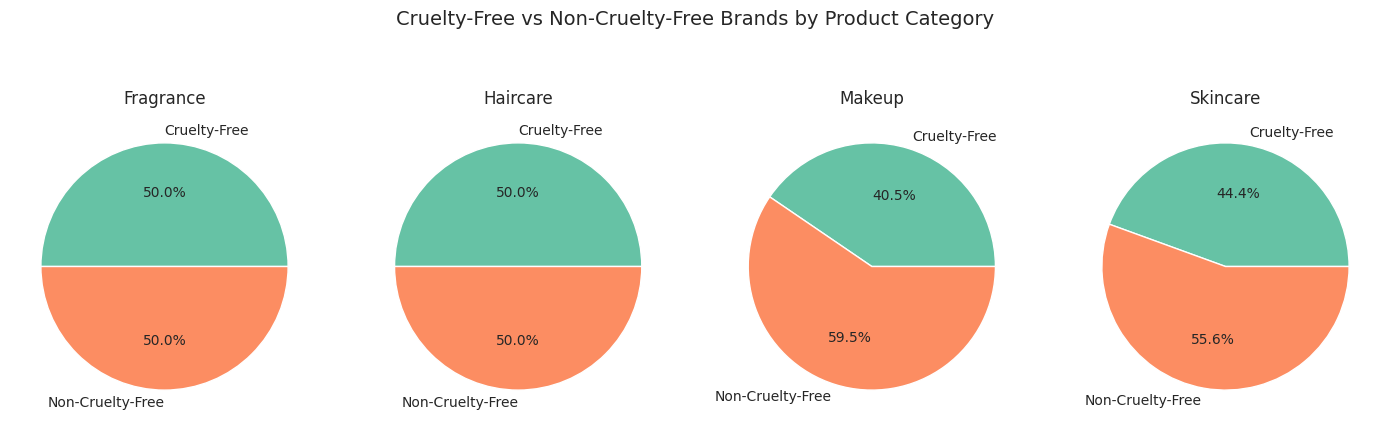

In [62]:
import matplotlib.pyplot as plt


category_counts = (
    df.groupby(['category', 'cruelty_free'])
      .size()
      .unstack(fill_value=0)
)

# create subplots
fig, axes = plt.subplots(1, len(category_counts), figsize=(14,5))

for ax, (cat, row) in zip(axes, category_counts.iterrows()):
    ax.pie(
        row,
        labels=['Cruelty-Free', 'Non-Cruelty-Free'],
        autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62']
    )
    ax.set_title(cat)

fig.suptitle('Cruelty-Free vs Non-Cruelty-Free Brands by Product Category', fontsize=14)
plt.tight_layout()
plt.show()


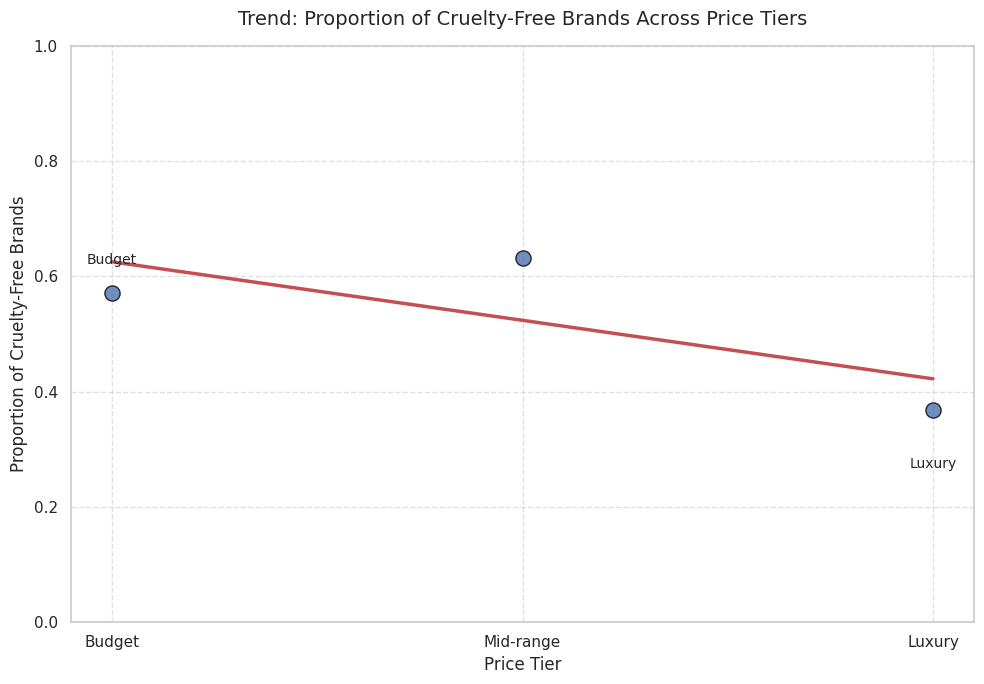

In [74]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')

# numeric encoding for price tiers
price_order = {'Budget': 1, 'Mid-range': 2, 'Luxury': 3}
df['price_numeric'] = df['price_tier'].map(price_order)

# compute mean proportion per tier
trend = (
    df.groupby('price_numeric')['cruelty_free']
      .mean()
      .reset_index()
)

# plot
sns.regplot(
    x='price_numeric', y='cruelty_free',
    data=trend,
    scatter_kws={'s':120, 'color':'#4C72B0', 'edgecolor':'black', 'zorder':3},
    line_kws={'color':'#C44E52', 'linewidth':2.5},
    ci=None
)

# improve layout
plt.title('Trend: Proportion of Cruelty-Free Brands Across Price Tiers', fontsize=14, pad=15)
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Proportion of Cruelty-Free Brands', fontsize=12)
plt.xticks([1,2,3], ['Budget', 'Mid-range', 'Luxury'])
plt.ylim(0,1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(1, trend['cruelty_free'].iloc[0]+0.05, 'Budget', ha='center', fontsize=10)
plt.text(3, trend['cruelty_free'].iloc[-1]-0.1, 'Luxury', ha='center', fontsize=10)
plt.tight_layout()
plt.show()
